In [1]:
import numpy as np
import scipy
from scipy.signal import welch

class SignalFeatures:
    """
    Signal Features class computes 16-features for an EMG signal,
    recommended in xxx
    
    Parameters:
        signal (list or array): 1D TimeSeries Filtered signal

    Attributes:

    """
    
    def __init__(self, signal):
        self.signal = np.array(signal)

    def mav(self):
        '''
        Returns: 
            mean absolute value of signal
        '''
        return np.mean(np.abs(self.signal))
    
    # Mean Absolute Value of First Fifference (of signal)
    def mavfd(self):
        a = self.signal
        return np.mean(np.sum(np.abs(a[i] - a[i+1]) for i in range(len(a) - 1)))
    
    # Mean Absolute Value of Second difference (of signal)
    def mavsd(self):
        a = self.signal
        return np.mean(np.sum(np.abs(a[i] - a[i+2]) for i in range(len(a) - 2)))
    
    # Signal Peak
    def peak(self):
        return

    # Root Mean Square
    def rms(self):
        return np.sqrt(np.sum(np.square(self.signal)))
    
    # Zero-crossing: Nr. of time signal changes from positive to negative
    def zc(self, threshold=0.0):
        nr_crossings = 0
        a = self.signal
        for i in range(len(a)):
            if ((a[i]*a[i+1]) < 0) & (np.abs(a[i] - a[i+1]) > threshold):
                nr_crossings += 1 

        return nr_crossings
    
    # Fmed
    def fmed(self):
        # fs ? 
        f, P = welch(self.signal, fs=fs, window='hanning', noverlap=0, nfft=int(256.))
        
        # Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
        area_freq = scipy.integrate.cumtrapz(P, f, initial=0)
        total_power = area_freq[-1]
        median_freq = f[where(area_freq >= total_power / 2)[0][0]]
        f_max = f[argmax(P)]
        return median_freq
    
    # Fmode
    # Max value of FFTransformed signal
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4712064/
    def fmode(self):
        return max(scipy.fft(self.signal))
    
    # Fmean
    # https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0180526
    def fmean(self):
        # fs ? 
        f, P = welch(self.signal, fs=fs, window='hanning', noverlap=0, nfft=int(256.))
        mnf = np.mean((f[i] * P[i]) for i in range(len(f))) / np.mean(P[i] for i in range(len(P)))
        return mnf
    
    # CF: Central Frequency
    def cf(self):
        return
    
    # Fuzzy entropy
    # MATLAB Equivalent
    # https://www.mathworks.com/matlabcentral/fileexchange/35784-sample-entropy
    def fuzzy_entropy(self, dim=1, tau=1):
        N = len(self.signal)
        correl = np.zeros(2,1)
        dataArr = np.zeros(dim+1,N-dim);
        
        for i in range(dim):
            dataArr[i, :] = self.signal[i:N-dim+i-1]
        
        for m in range(dim):
            count = np.zeros((1, N-dim))
            tempArr = dataArr[0:m, :]
            
            for i in range(N-m):
                # Calculate Chebyshev distance, excluding self-matching case
                dist = max(abs(tempArr[:,i:N-dim]) - repmat(tempArr[:,i],1,N-dim-i)));

                # Calculate Heaviside function of the distance
                # User can change it to any other function
                # for modified sample entropy (mSampEn) calculation
                D = (dist < r);

                count[i] = sum(D)/(N-dim);
            
            correl[m-dim] = sum(count) / (N-dim)
            
        return np.log(correl[0]/correl[1])
    
    # Approximate entropy
    def approximate_entropy(self):
        return
    
    # Variability
    def var(self):
        return np.var(self.signal)
    
    # Standard Deviation
    def std(self):
        return np.std(self.signal)
    
    # Range
    def srange(self):
        return np.ptp(self.signal)
    
    # Int Range
    def intrange(self):
        return scipy.stats.iqr(self.signal)

In [179]:
import numpy as np

x = np.array([3, 5, -2, 1])
# np.argmax(x)
# # var(x)

# def ollie():
#     for i in x:
#         yield i**i

# a = ollie()
# np.fromiter(a, float)
zc = np.where(np.diff(np.signbit(x)))[0]
a = len(zc)
a
# for b in a:
#     print(b)
# first_differences = [functools.partial(lambda i, a: a[i] - a[i + 1], i) for i in range(len(x) - 1)]

# for fd in first_differences:
#     np.mean(np.abs(fd))
# first_differences_arr = np.array(first_differences(x))
# np.mean(np.abs(first_differences_arr))

2

In [180]:
signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq

array([ 0.  ,  1.25,  2.5 ,  3.75, -5.  , -3.75, -2.5 , -1.25])

In [ ]:
signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq

In [41]:
a = np.zeros((2,10))
# a[0,:]
a[0:1, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
import scipy

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = scipy.fft(x)

max(y)

(4.5+0j)

In [16]:
import pandas as pd

sample = pd.read_csv('recordings/raw/aun_start16s.txt', sep=",", skiprows=4)
sample

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.2,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Timestamp (Formatted)
0,39.0,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:33:31.707
1,40.0,43866.480469,-187500.015625,-8980.751953,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:33:31.707
2,41.0,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:33:31.707
3,42.0,43898.175781,-187500.015625,-8967.832031,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:33:31.707
4,43.0,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:33:31.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23085,178.0,45358.972656,-187500.015625,-9449.691406,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-0.030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:35:03.419
23086,179.0,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-0.030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:35:03.419
23087,180.0,45317.445312,-187500.015625,-9446.137695,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-0.032,...,0.0,255.0,32.0,30.0,96.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:35:03.419
23088,181.0,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-187500.015625,-0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.610736e+09,2021-01-15 20:35:03.419


In [21]:
sample.loc[1][' Timestamp'] - sample.loc[0][' Timestamp']

8.58306884765625e-06

In [22]:
sample.loc[2][' Timestamp'] - sample.loc[1][' Timestamp']

8.106231689453125e-06

In [23]:
diff_ls = []
for i in range(len(sample) - 1):
    diff_ls.append(sample.loc[i+1][' Timestamp'] - sample.loc[i][' Timestamp'])

np.mean(diff_ls)    

0.00397210575708289

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7186320f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc718632668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc718632048>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc718632c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc718632ef0>],
 'means': []}

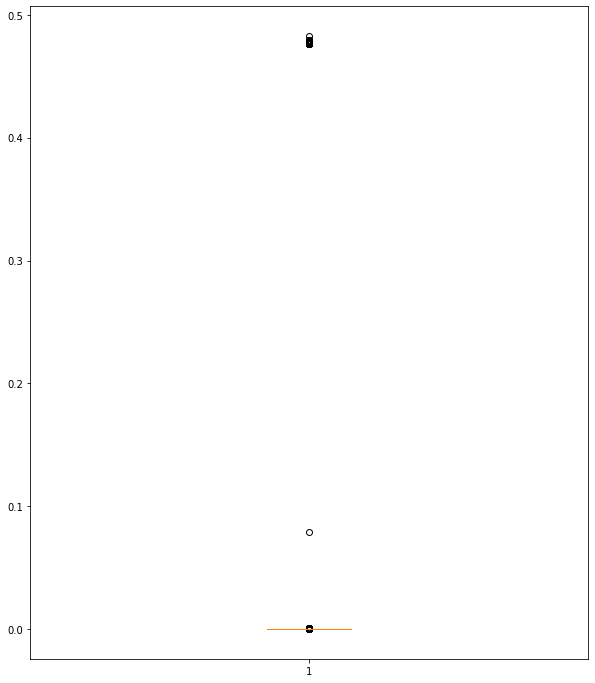

In [25]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, figsize=(10,12))
axs.boxplot(diff_ls)

In [47]:
items = ["apple", "banana", "oranges"]

def clean_method():
    for item in items:
        if len(item) == 6:
            yield item

ans = clean_method()
print(ans)
# for item in ans:
#     print(item)

<generator object clean_method at 0x7fc718bb0318>


In [63]:
a = [i**i for i in range(5)]
for i, v in enumerate(a):
    print("{}, {}".format(i,v))

0, 1
1, 1
2, 4
3, 27
4, 256


In [ ]:
# Verify code quality
# PEP8, *Flake8*, PyFlakes, Pylint

In [69]:
import functools as boner

tests = [boner.partial(lambda i, a: i*a, i) for i in range(3)]
for test in tests:
    print(test(5))

0
5
10


In [117]:
a = list(range(3))
a.remove(0)
a.insert(0,70)
a = list(set(a))
i, j, k = a
i

1

In [110]:
set('spam') > set('eggs')

False

In [111]:
set(['toms', 'berkins', 'prada']) ^ set(['toms', 'nike', 'adidas'])

{'adidas', 'berkins', 'nike', 'prada'}

In [144]:
import pprint

def hihi(**kwargs):
    pprint.pprint(kwargs)

hihi(name='Hudson', age=27, riigi='kamerun')

{'age': 27, 'name': 'Hudson', 'riigi': 'kamerun'}


In [143]:
import collections

queue = collections.deque()
queue.append(1)
queue.append(2)


deque([1])

In [146]:
# pprint.pprint(sample)

In [152]:
import json

def tree(): return collections.defaultdict(tree)
a = collections.defaultdict(tree)
a['Us']['Producer'] = 'James'

print(json.dumps(a, indent=4))

{
    "Us": {
        "Producer": "James"
    }
}


In [156]:
import re

class Mazo:
    def __init__(self):
        self.x = 0
    def mazi(self):
        return 4
    def mozo(self):
        return 0
    def eze(self):
        methods = [method for method in dir(self) if callable(getattr(self, method))]
        methods.remove('eze')
        method_dict = {}
        for method in methods:
            if not re.match('__', method) and not re.match('_validation__', method):
                method_dict[method] = ''
        return method_dict

a = Mazo()
pprint.pprint(a.eze())

{'mazi': '', 'mozo': ''}
